# Customer Understanding and Impact of Promo

In this notebook, we shall perform a complete exploratory analysis on Promo Data. 

## Importing the Necessary Libraries

First, we import necessary libraries for dataframes, statistics and visualizations.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
%matplotlib inline
sns.set(color_codes=True)

## Uploading the Dataset


Next, we upload our dataset and convert it into a dataframe using the pandas read_csv function. We check the data contents as well.

In [2]:
df = pd.read_csv("C:/Users/Beems/Downloads/HY/promo_order_data.csv")
df.head()


,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [3]:
df.tail()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
2480,2021-05-31,17,18.0,16.0,18.0,358.6,0.0,NaN,2.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,18.0
2481,2021-05-31,18,10.0,10.0,10.0,380.6,0.0,NaN,0.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0
2482,2021-05-31,19,4.0,4.0,4.0,69.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2483,2021-05-31,20,4.0,4.0,4.0,17.6,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
2484,2021-05-31,21,2.0,2.0,2.0,92.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0


## Cleaning the dataset

In this section, we will identify any missing values or inconsistencies. We shall also clean the data by removing outliers, changing data types, and checking for duplicates.

#### Dropping irrelevant columns ####

The 'promo amount' column is to be disregarded so we drop the column.

In [4]:
df = df.drop('promo_amount', axis=1)
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


#### Renaming Columns ####

We rename the columns for better legibility and ease of use.

In [5]:
df = df.rename(columns = {'trans_date':'Date' , 'trans_hour': 'Hour','customers': 'Customer Count', 'vendors': 'Vendor Count', 'orders': 'Order Count', 'amount': 'Order Amount(AUD)', 'promo_count': 'Promo Count'})
df.head(5)

,Date,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


In [6]:
df.dtypes

Date                  object
Hour                   int64
Customer Count       float64
Vendor Count         float64
Order Count          float64
Order Amount(AUD)    float64
Promo Count          float64
Android              float64
GCF                  float64
Macintosh            float64
Tablet               float64
Windows              float64
X11                  float64
iPhone               float64
Blacklisted          float64
Not Blacklisted      float64
dtype: object

#### Removing Outliers ####

We will visualize the outliers for each numeric column. Afterwards, we will remove the outliers by utilizing IQR method.

In [7]:
df.shape

(2485, 16)

In [8]:
df.describe()

,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2485.000000,2485.000000
mean,12.748893,1368.490946,388.434608,1391.750503,10501.810254,28.863581,76.957230,24.561303,1.492464,0.802444,3.137271,4.015479,414.123829,0.123139,1368.367807
std,4.803603,2004.241830,408.808706,2035.524228,13429.995228,52.014765,108.116562,27.477949,2.556263,1.627893,4.718685,5.286395,576.293209,0.516366,2004.155656
min,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,9.000000,28.000000,20.000000,28.000000,625.800000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,28.000000
50%,13.000000,474.000000,254.000000,482.000000,4485.200000,4.000000,28.000000,12.000000,0.000000,0.000000,0.000000,2.000000,146.000000,0.000000,474.000000
75%,17.000000,1892.000000,624.000000,1924.000000,14793.460000,32.000000,108.000000,40.000000,2.000000,2.000000,4.000000,6.000000,645.000000,0.000000,1892.000000
max,23.000000,9910.000000,1482.000000,10046.000000,63756.420000,442.000000,556.000000,138.000000,16.000000,12.000000,30.000000,30.000000,2918.000000,4.000000,9910.000000


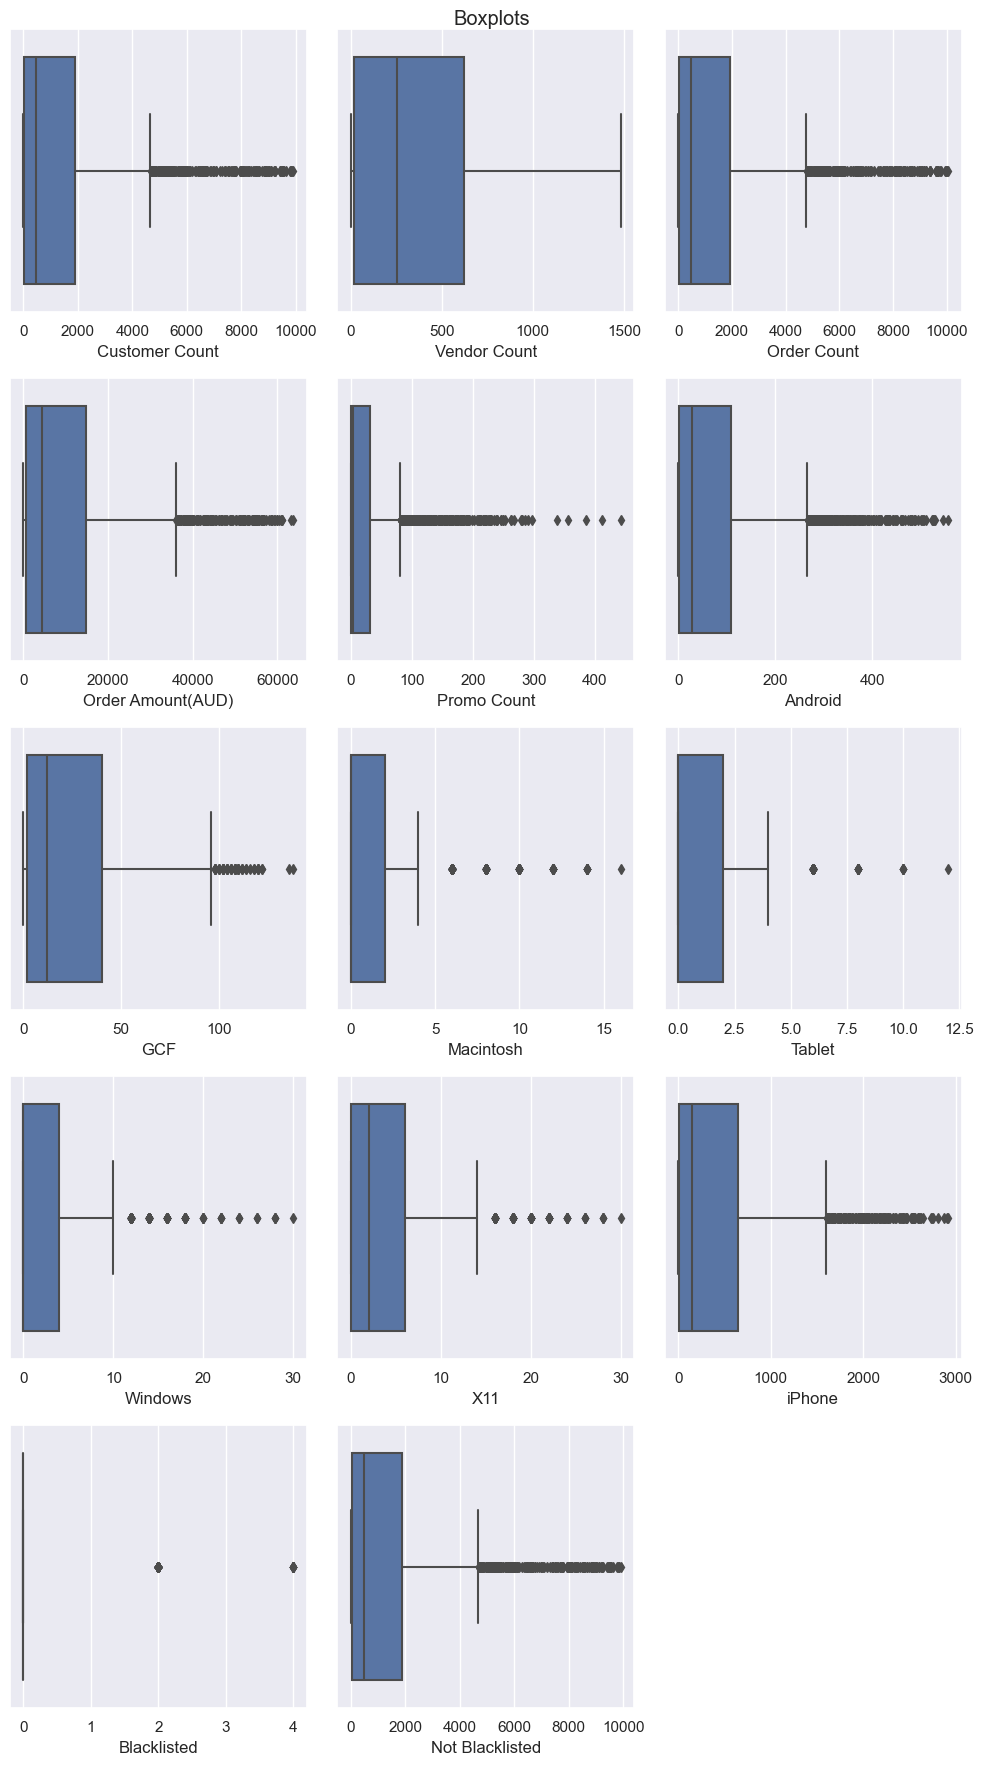

In [9]:
fig, axes = plt.subplots(5, 3, figsize=[10, 18])
sns.boxplot(x="Customer Count", data = df, ax = axes[0,0])
sns.boxplot(x="Vendor Count", data = df, ax = axes[0,1])
sns.boxplot(x="Order Count", data = df, ax = axes[0,2])
sns.boxplot(x="Order Amount(AUD)", data = df, ax = axes[1,0])
sns.boxplot(x="Promo Count", data = df, ax = axes[1,1])
sns.boxplot(x="Android", data = df, ax = axes[1,2])
sns.boxplot(x="GCF", data = df, ax = axes[2,0])
sns.boxplot(x="Macintosh", data = df, ax = axes[2,1])
sns.boxplot(x="Tablet", data = df, ax = axes[2,2])
sns.boxplot(x="Windows", data = df, ax = axes[3,0])
sns.boxplot(x="X11", data = df, ax = axes[3,1])
sns.boxplot(x="iPhone", data = df, ax = axes[3,2])
sns.boxplot(x="Blacklisted", data = df, ax = axes[4,0])
sns.boxplot(x="Not Blacklisted", data = df, ax = axes[4,1])
axes[4, 2].axis('off')
plt.suptitle ("Boxplots")
fig.tight_layout()
plt.show()

Above, we can see that 'Vendor Count' does not have outliers, so we shall exclude it. Addtionally, performing IQR on 'Blacklisted', would only leave 0 as its value, as such, we shall exclude it as well.

In [10]:
Q1 = df[['Customer Count','Order Count','Order Amount(AUD)','Android','GCF','Macintosh','Tablet','Windows','X11','iPhone','Not Blacklisted']].quantile(0.25)
Q3 = df[['Customer Count','Order Count','Order Amount(AUD)','Android','GCF','Macintosh','Tablet','Windows','X11','iPhone','Not Blacklisted']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer Count        1864.00
Order Count           1896.00
Order Amount(AUD)    14167.66
Android                106.00
GCF                     38.00
Macintosh                2.00
Tablet                   2.00
Windows                  4.00
X11                      6.00
iPhone                 635.00
Not Blacklisted       1864.00
dtype: float64


In [11]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.reset_index(drop=True)
df.shape

(2017, 16)

After outlier removal, 2017 rows were left, 468 of which were deemed outliers. 

#### Changing Data Types ####

In [12]:
df.dtypes

Date                  object
Hour                   int64
Customer Count       float64
Vendor Count         float64
Order Count          float64
Order Amount(AUD)    float64
Promo Count          float64
Android              float64
GCF                  float64
Macintosh            float64
Tablet               float64
Windows              float64
X11                  float64
iPhone               float64
Blacklisted          float64
Not Blacklisted      float64
dtype: object

All other columns are in the preferred data type aside from the 'Date' column. So lets convert, the 'Date' to datetime data type.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

,Date,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


#### Treating Null Values

In [14]:
df[df['Android'].isna()]

,Date,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
118,2021-01-09,5,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
175,2021-01-12,23,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
216,2021-01-16,2,2.0,2.0,2.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
357,2021-01-26,5,2.0,2.0,2.0,8.4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
385,2021-01-27,21,2.0,2.0,2.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
457,2021-02-02,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
537,2021-02-08,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
552,2021-02-09,4,2.0,2.0,2.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
621,2021-02-13,21,2.0,2.0,2.0,90.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
622,2021-02-14,5,2.0,2.0,2.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0


As can be noted above, the null values are located in the columns for device platforms. These null values are valid since not all customers are classified in the given kinds of device platforms. Thus, we can replace the 'NaN' with 0 for easier data work.

In [15]:
df[['Customer Count','Vendor Count','Order Count','Promo Count','Android','GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone','Blacklisted','Not Blacklisted']] = df[['Customer Count','Vendor Count','Order Count','Promo Count','Android','GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone','Blacklisted','Not Blacklisted']].fillna(0)

In [16]:
df.isna()

,Date,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
print(df.isnull().sum())

Date                 0
Hour                 0
Customer Count       0
Vendor Count         0
Order Count          0
Order Amount(AUD)    0
Promo Count          0
Android              0
GCF                  0
Macintosh            0
Tablet               0
Windows              0
X11                  0
iPhone               0
Blacklisted          0
Not Blacklisted      0
dtype: int64


We have now removed null values from our dataset.

#### Checking for Duplicates ####

In [18]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 16)


## Analyzing the Dataset ##

In this section, we shall determine how promos affect the various parameters present in our dataset. We shall employ various visualizations and statistical techniques.

#### Descriptive Statistics ####

In [19]:
df.describe()

,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,13.606842,645.344571,241.234507,657.030243,5708.308151,11.280119,36.617749,14.973723,0.607833,0.336143,1.505206,2.263758,203.596430,0.096182,645.248389
std,4.886876,856.333005,268.439481,872.006111,7284.204174,22.686383,49.676904,17.910043,1.155301,0.870623,2.545440,3.107505,279.860279,0.454988,856.252847
min,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,10.000000,20.000000,14.000000,20.000000,487.600000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,20.000000
50%,14.000000,176.000000,80.000000,178.000000,1585.800000,2.000000,10.000000,6.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.000000,176.000000
75%,18.000000,1126.000000,476.000000,1146.000000,10290.840000,12.000000,64.000000,24.000000,0.000000,0.000000,2.000000,4.000000,316.000000,0.000000,1126.000000
max,23.000000,4596.000000,1164.000000,4674.000000,32611.500000,262.000000,260.000000,92.000000,4.000000,4.000000,10.000000,14.000000,1306.000000,4.000000,4596.000000


#### Discerning Patterns by Visualizations

We shall determine how Customer Count, Order Amount, Vendor Count and Promotion Count, affect Order Amount (AUD). Visually, we shall use a linear regression plot to asses the relationship. Afterwards, we will use Pearson Correlation Test to determine statitical significance at We use alpha = 0.05.

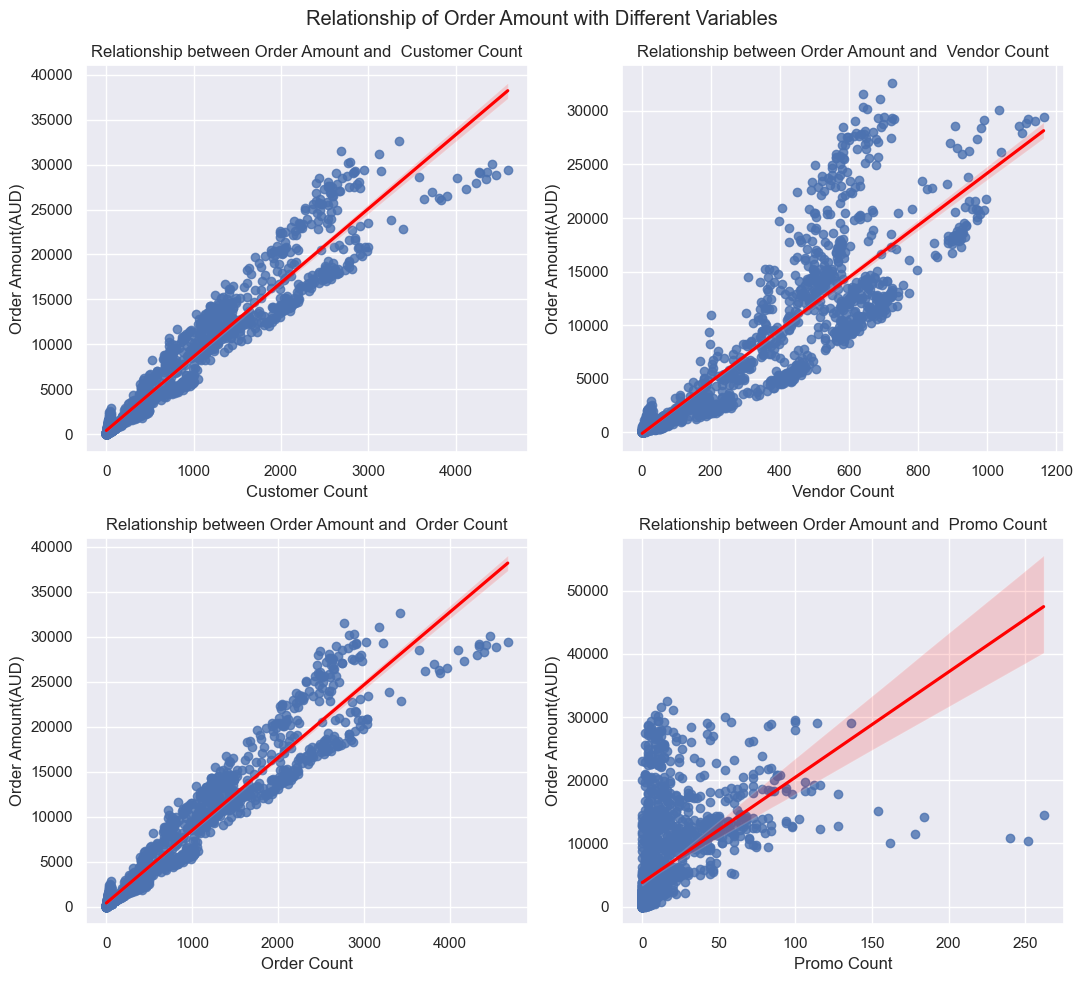

In [20]:
fig, axes = plt.subplots(2, 2, figsize=[11, 10])
sns.regplot(x="Customer Count", y="Order Amount(AUD)", data = df, ax = axes[0,0],line_kws={"color": "red"})
sns.regplot(x="Vendor Count", y="Order Amount(AUD)", data = df, ax = axes[0,1],line_kws={"color": "red"})
sns.regplot(x="Order Count", y="Order Amount(AUD)", data = df, ax = axes[1,0],line_kws={"color": "red"})
sns.regplot(x="Promo Count", y="Order Amount(AUD)", data = df, ax = axes[1,1],line_kws={"color": "red"})
axes[0,0].set_title ("Relationship between Order Amount and  Customer Count")
axes[0,1].set_title("Relationship between Order Amount and  Vendor Count")
axes[1,0].set_title("Relationship between Order Amount and  Order Count")
axes[1,1].set_title("Relationship between Order Amount and  Promo Count")
plt.suptitle ("Relationship of Order Amount with Different Variables")
fig.tight_layout()
plt.show()

In [21]:
p_coef1, p_val1 = stats.pearsonr(df['Customer Count'], df['Order Amount(AUD)'])
p_coef2, p_val2 = stats.pearsonr(df['Vendor Count'], df['Order Amount(AUD)'])
p_coef3, p_val3 = stats.pearsonr(df['Order Count'], df['Order Amount(AUD)'])
p_coef4, p_val4 = stats.pearsonr(df['Promo Count'], df['Order Amount(AUD)'])
print("Pearson Correlation Coefficient:\nCustomer Count =",p_coef1, "\nVendor Count = ", p_coef2,"\nOrder Count = ", p_coef3,
     "\nPromo Count = ",p_coef4 )
print("\nP-value:\nCustomer Count = ", p_val1, "\nVendor Count = ", p_val2,"\nOrder Count = ", p_val3,
     "\nPromo Count = ",p_val4 )

Pearson Correlation Coefficient:
Customer Count = 0.9677544218069387 
Vendor Count =  0.896546544622951 
Order Count =  0.9686135637817892 
Promo Count =  0.5187368799924542

P-value:
Customer Count =  0.0 
Vendor Count =  0.0 
Order Count =  0.0 
Promo Count =  2.3896179532910878e-139


Above we see that there is a strong linear relationship between Customer Count and Order Amount. Additionally, The p-value suggests that the correlation between the two attributes is statistically significant. Therefore when there is an increase in customer the order amount also increases. Similary, the relationship of Vendor Count and Order Amount, and Order Count and Order Amount follow the same conclusions. Meanwhile, the correlation between Promo Count and Order Amount is statistically significant, however, the linear relationship is moderate only. 

In [22]:
p_coef1, p_val1 = stats.pearsonr(df['Customer Count'], df['Promo Count'])
p_coef2, p_val2 = stats.pearsonr(df['Vendor Count'], df['Promo Count'])
p_coef3, p_val3 = stats.pearsonr(df['Order Count'], df['Promo Count'])
print("Pearson Correlation Coefficient:\nCustomer Count =",p_coef1, "\nVendor Count = ", p_coef2,"\nOrder Count = ", p_coef3 )
print("\nP-value:\nCustomer Count  ", p_val1, "\nVendor Count = ", p_val2,"\nOrder Count = ", p_val3)

Pearson Correlation Coefficient:
Customer Count = 0.5728192623748716 
Vendor Count =  0.7007063467504592 
Order Count =  0.5731573250251638

P-value:
Customer Count   3.06514143903195e-176 
Vendor Count =  8.536518506737013e-298 
Order Count =  1.7132685515680696e-176


Checking the relationship of Customer Count, Vendor Count, and Order Count with Promo Count, we see that Vendor Count has a relatively strong relationship with Promotion Count, as compared to the other two attributes. It is possible that vendors have a say when promotions happen.

#### Impact of Promos

Here we will group the data whether the orders had promos or not. Then we shall compare the median values of Customer Count, Vendor Count, Order Count, and Order Amount(AUD) between the two groups. For comparison, we shall use bar charts plotted monthly and weekly, as well as use Mann-Whitney U test.

In [23]:
df['Has Promo?'] = (df['Promo Count'] == 0)
df['Has Promo?'] = df['Has Promo?'].map({True: 'True', False: 'False'}) 
df['Has Promo?'] = df['Has Promo?'].map({'True': 'No Promo', 'False': 'With Promo'}) 
df['Day of Week'] = df['Date'].dt.day_name()
df['Day of Month'] = df['Date'].dt.day
df['Month Name'] = df['Date'].dt.month_name(locale='English')
df['Day'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df.head()

,Date,Hour,Customer Count,Vendor Count,Order Count,Order Amount(AUD),Promo Count,Android,GCF,Macintosh,...,X11,iPhone,Blacklisted,Not Blacklisted,Has Promo?,Day of Week,Day of Month,Month Name,Day,Month
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,...,0.0,22.0,0.0,52.0,No Promo,Friday,1,January,4,1
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,...,2.0,76.0,0.0,248.0,With Promo,Friday,1,January,4,1
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,...,2.0,184.0,0.0,584.0,With Promo,Friday,1,January,4,1
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,...,2.0,232.0,0.0,786.0,With Promo,Friday,1,January,4,1
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,...,2.0,230.0,0.0,894.0,With Promo,Friday,1,January,4,1


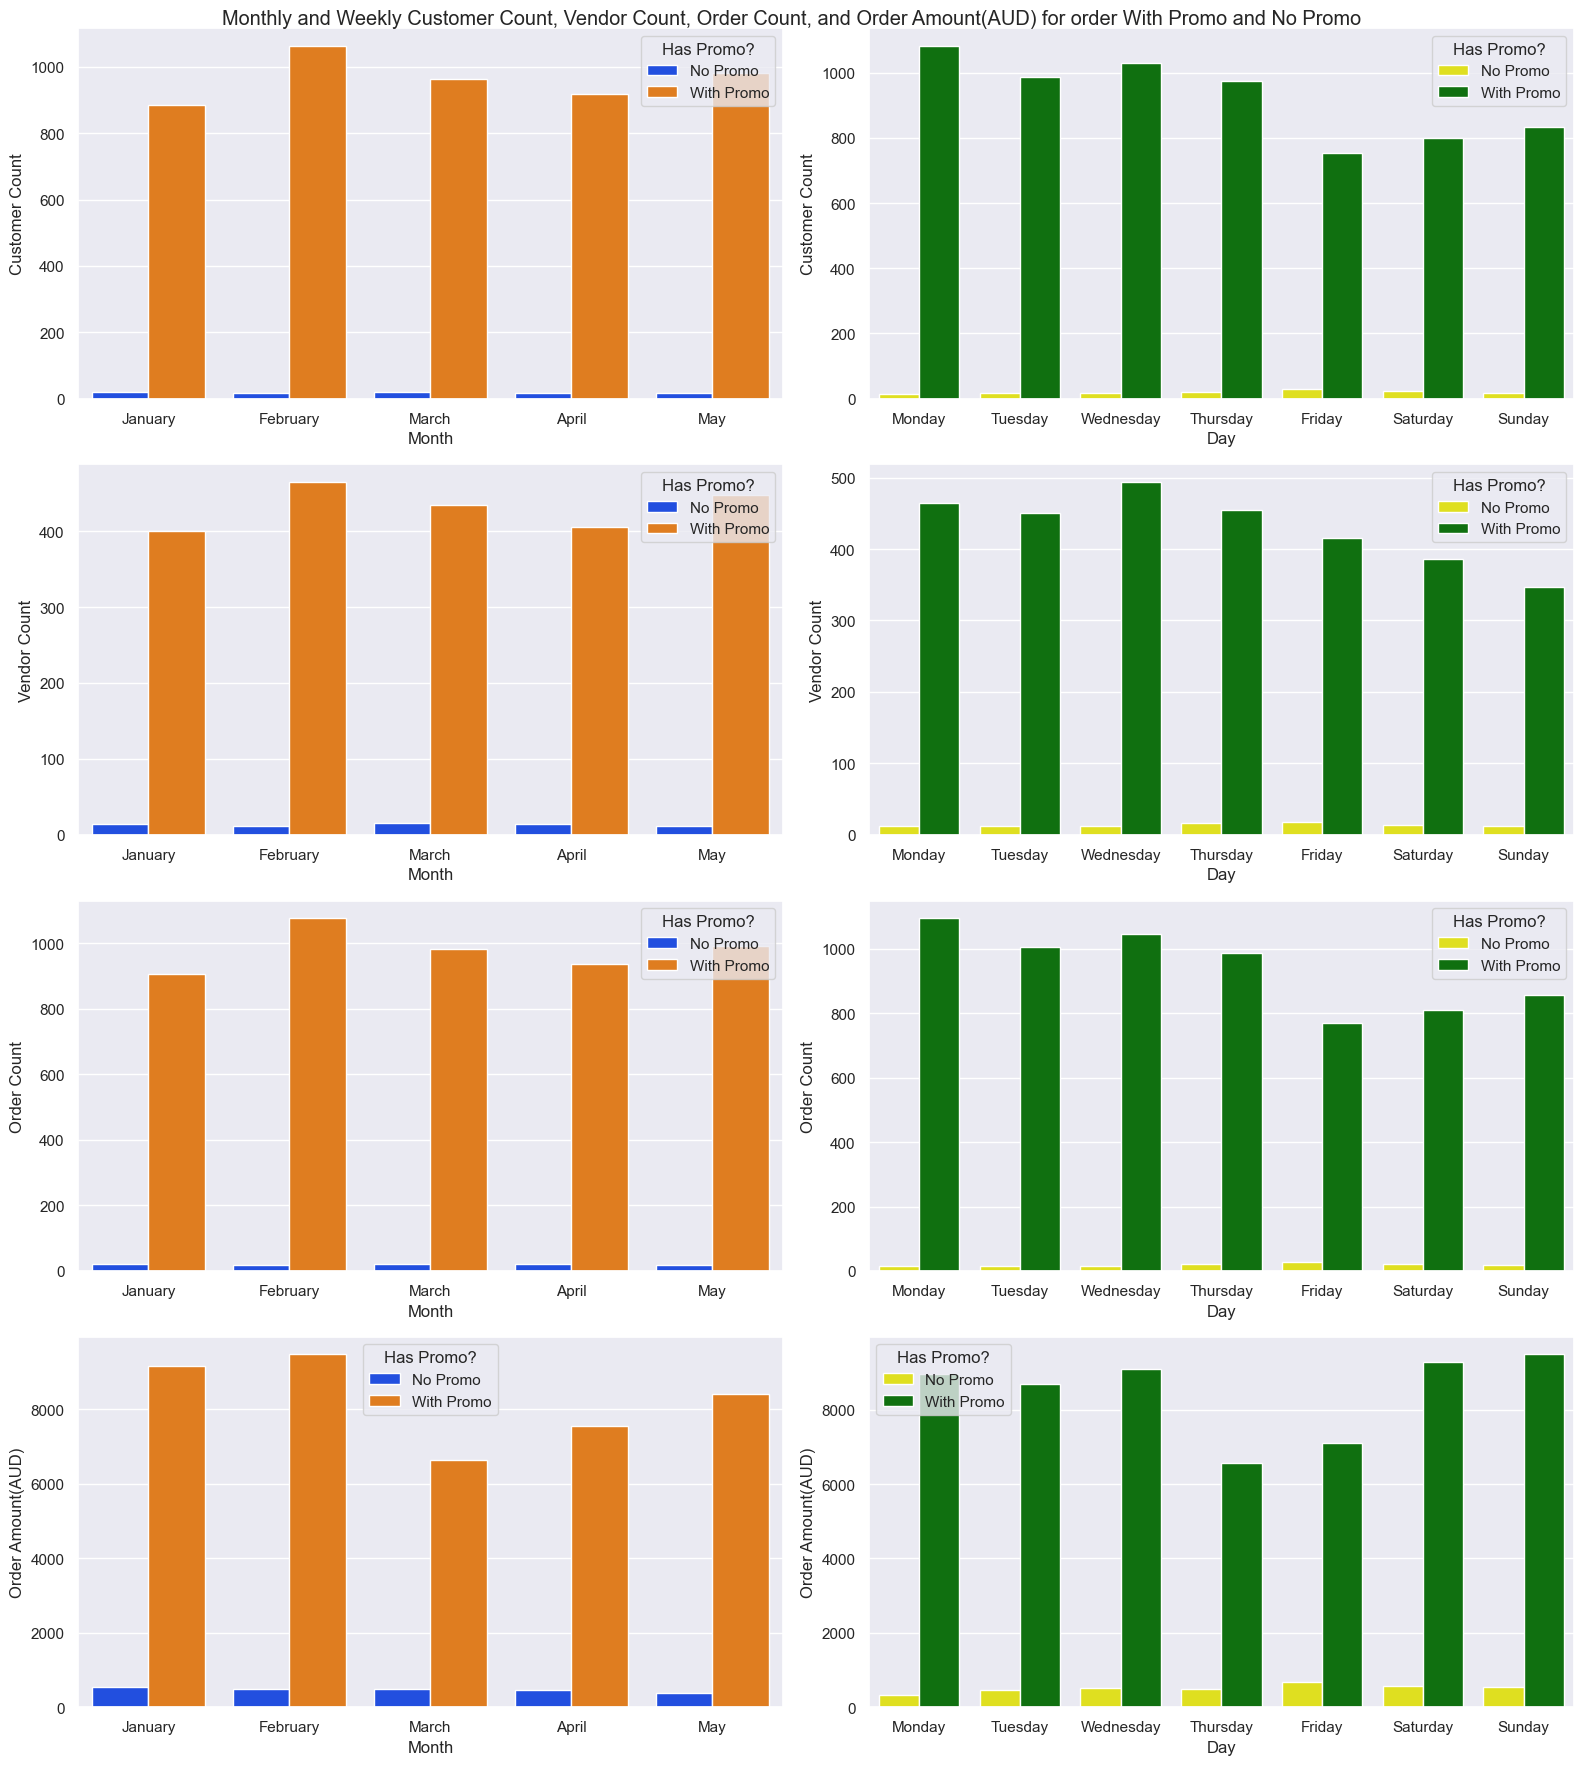

In [24]:
fig, axes = plt.subplots(4, 2, figsize=[16, 18])
sns.set_palette("bright")
color = ['yellow', 'green']
sns.barplot(x="Month", y="Customer Count", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[0,0]).set_xticklabels(['January','February','March','April','May'])
sns.barplot(x="Month", y="Vendor Count", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[1,0]).set_xticklabels(['January','February','March','April','May'])
sns.barplot(x="Month", y="Order Count", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[2,0]).set_xticklabels(['January','February','March','April','May'])
sns.barplot(x="Month", y="Order Amount(AUD)", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[3,0]).set_xticklabels(['January','February','March','April','May'])
sns.barplot(x="Day", y="Customer Count", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[0,1], palette = color).set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.barplot(x="Day", y="Vendor Count", hue="Has Promo?", data=df, ci=None, estimator=np.median,  ax = axes[1,1], palette = color).set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.barplot(x="Day", y="Order Count", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[2,1], palette = color).set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.barplot(x="Day", y="Order Amount(AUD)", hue="Has Promo?", data=df, ci=None, estimator=np.median, ax = axes[3,1], palette = color).set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.suptitle ("Monthly and Weekly Customer Count, Vendor Count, Order Count, and Order Amount(AUD) for order With Promo and No Promo")
fig.tight_layout()
plt.show()

Visually, we can observe that in all cases the group 'With Promo' is always greater than those with 'No Promo'. We can infer that promotions in general have a signifcant impact on the business.

In [25]:
df['Has Promo?'].value_counts()

With Promo    1145
No Promo       872
Name: Has Promo?, dtype: int64

In [26]:
df_gptest = df[['Has Promo?', 'Customer Count', 'Vendor Count', 'Order Count', 'Order Amount(AUD)']]
grouped_test1 = df_gptest.groupby(['Has Promo?'])
U_val1, p_val1 = stats.mannwhitneyu(grouped_test1.get_group('With Promo')['Customer Count'],grouped_test1.get_group('No Promo')['Customer Count'], alternative = 'greater')
U_val2, p_val2 = stats.mannwhitneyu(grouped_test1.get_group('With Promo')['Vendor Count'],grouped_test1.get_group('No Promo')['Vendor Count'], alternative = 'greater')
U_val3, p_val3 = stats.mannwhitneyu(grouped_test1.get_group('With Promo')['Order Count'],grouped_test1.get_group('No Promo')['Order Count'], alternative = 'greater')
U_val4, p_val4 = stats.mannwhitneyu(grouped_test1.get_group('With Promo')['Order Amount(AUD)'],grouped_test1.get_group('No Promo')['Order Amount(AUD)'], alternative = 'greater')


print("Mann-Whitney U Test results:\nCustomer Count =",U_val1, "\nVendor Count = ", U_val2,"\nOrder Count = ", U_val3,
     "\nOrder Amount = ",U_val4 )
print("\nP-value:\nCustomer Count  ", p_val1, "\nVendor Count = ", p_val2,"\nOrder Count = ", p_val3,
     "\nOrder Amount(AUD) = ",p_val4 )


Mann-Whitney U Test results:
Customer Count = 933067.5 
Vendor Count =  936670.5 
Order Count =  933348.0 
Order Amount =  910142.5

P-value:
Customer Count   3.7453854391293463e-246 
Vendor Count =  2.8890447125715253e-250 
Order Count =  1.8185591865709243e-246 
Order Amount(AUD) =  5.248771083130661e-221


To further determine the significance, we use Mann-Whitney U Test to statistically compare the difference between the 'No Promo' and 'With Promo' groups. We use alpha = 0.05. The results indicated that the 'With Promo' group had significantly greater Customer, Vendor, Order Counts and Order Amounts than the 'No Promo' group. This reinforces our intial statement that promotions have a significant impact on the business. In the succeeding sections, we shall see if promos also affect the users.

#### Customer Profiles

The present customer categories in the dataset are users of Android, iPhones, Macintosh OS, Windows OS, X11 OS, Tablet devices and Google Food Ordering Services. Additionally, we also have categories for those that were blacklisted and not blacklisted.

In [27]:
df1 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['Android', 'iPhone'],var_name='Mobile Platform',value_name='Total Count')
df2 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['Macintosh', 'Windows', 'X11'],var_name='Desktop Platform', value_name='Total Count')
df3 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['Tablet',],var_name='Tablet', value_name='Total Count')
df4 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['GCF'],var_name='Google Food Order', value_name='Total Count')

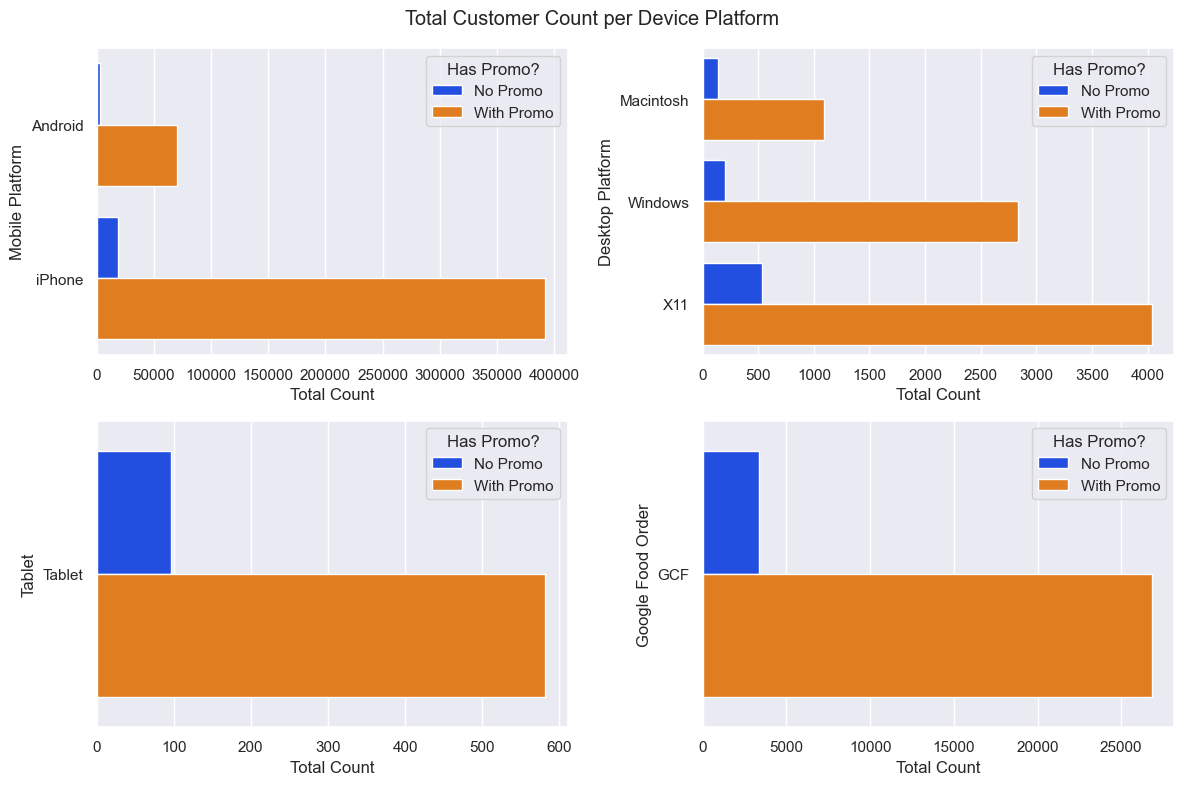

In [28]:
fig, axes = plt.subplots(2, 2, figsize=[12, 8])
sns.set_palette("bright")
sns.barplot(x="Total Count", y="Mobile Platform", hue="Has Promo?", orient='h', data=df1, ci=None, estimator=np.sum, ax = axes[0,0])
sns.barplot(x="Total Count", y="Desktop Platform", hue="Has Promo?", orient='h', data=df2, ci=None, estimator=np.sum, ax = axes[0,1])
sns.barplot(x="Total Count", y="Tablet", hue="Has Promo?", orient='h', data=df3, ci=None, estimator=np.sum, ax = axes[1,0])
sns.barplot(x="Total Count", y="Google Food Order", hue="Has Promo?", orient='h', data=df4, ci=None, estimator=np.sum, ax = axes[1,1])
plt.suptitle ("Total Customer Count per Device Platform")
fig.tight_layout()
plt.show()



We divided the customer device based on platform. For Android and iPhone, we ascribed it to Mobile Platform. Then for X11, Windows and Macintosh, those are ascribed to Desktop Platform. Grouping of the platforms was based on the range. Tablet and GCF have separate categories of their own due to uniqueness of the platforms. We tabulated the sum of each platform and grouped by 'No Promo'and 'With Promo'. Visually, we can infer that there is increased activity on the app when there is a promo. Visually, we can see those Platforms that had relatively high number of users who were active without promotion.

In [29]:
df_gptest2 = df[['Has Promo?','Android', 'iPhone', 'Macintosh', 'Windows', 'X11','GCF','Tablet']]
grouped_test2 = df_gptest2.groupby(['Has Promo?'])
print('No. of iPhone (No Promo) = ', grouped_test2.get_group('No Promo')['iPhone'].sum())
print('No. of GCF (No Promo) = ', grouped_test2.get_group('No Promo')['GCF'].sum())
print('No. of Android (No Promo) = ', grouped_test2.get_group('No Promo')['Android'].sum())
print('No. of Tablet (No Promo) = ', grouped_test2.get_group('No Promo')['Tablet'].sum())

No. of iPhone (No Promo) =  18498.0
No. of GCF (No Promo) =  3392.0
No. of Android (No Promo) =  3290.0
No. of Tablet (No Promo) =  96.0


We can see below that the highest percentage of users who were active with no promotion were Tablet users. Next, were the google food ordering users. Android and iPhone users, while having relatively large user bases, were similar in percentage value. 

In [30]:
x1 = (grouped_test2.get_group('No Promo')['iPhone'].sum()/df['iPhone'].sum())*100
x2 = (grouped_test2.get_group('No Promo')['GCF'].sum()/df['GCF'].sum())*100
x3 = (grouped_test2.get_group('No Promo')['Android'].sum()/df['Android'].sum())*100
x4 = (grouped_test2.get_group('No Promo')['Tablet'].sum()/df['Tablet'].sum())*100
print('% of iPhone (No Promo) = ', x1)
print('% of GCF (No Promo) = ', x2)
print('% of Android (No Promo) = ', x3)
print('% of Tablet (No Promo) = ', x4)


% of iPhone (No Promo) =  4.504522055063386
% of GCF (No Promo) =  11.231044301701875
% of Android (No Promo) =  4.454493758292941
% of Tablet (No Promo) =  14.15929203539823


Below are plots of total Customer Count, and user count for different platforms. We can observe that total customer count increases around 5 a.m. and peaks at around 8 am or 9 am. Afterwards, the is a gradual decrease in customers. This could possibly correspond to the morning rush hour where workers order coffee/breakfast items on their way to work. It can also be noted that there are slight peaks near 12 am. which could correspond to lunch orders. Most platforms subscribe to the said inferences except for Windows and Macintosh. A possible explanation, in conjunction with the first statement, is that these are work desktop computers. This would mean that the oppurtunity to order would be only at the office and at lunch time.

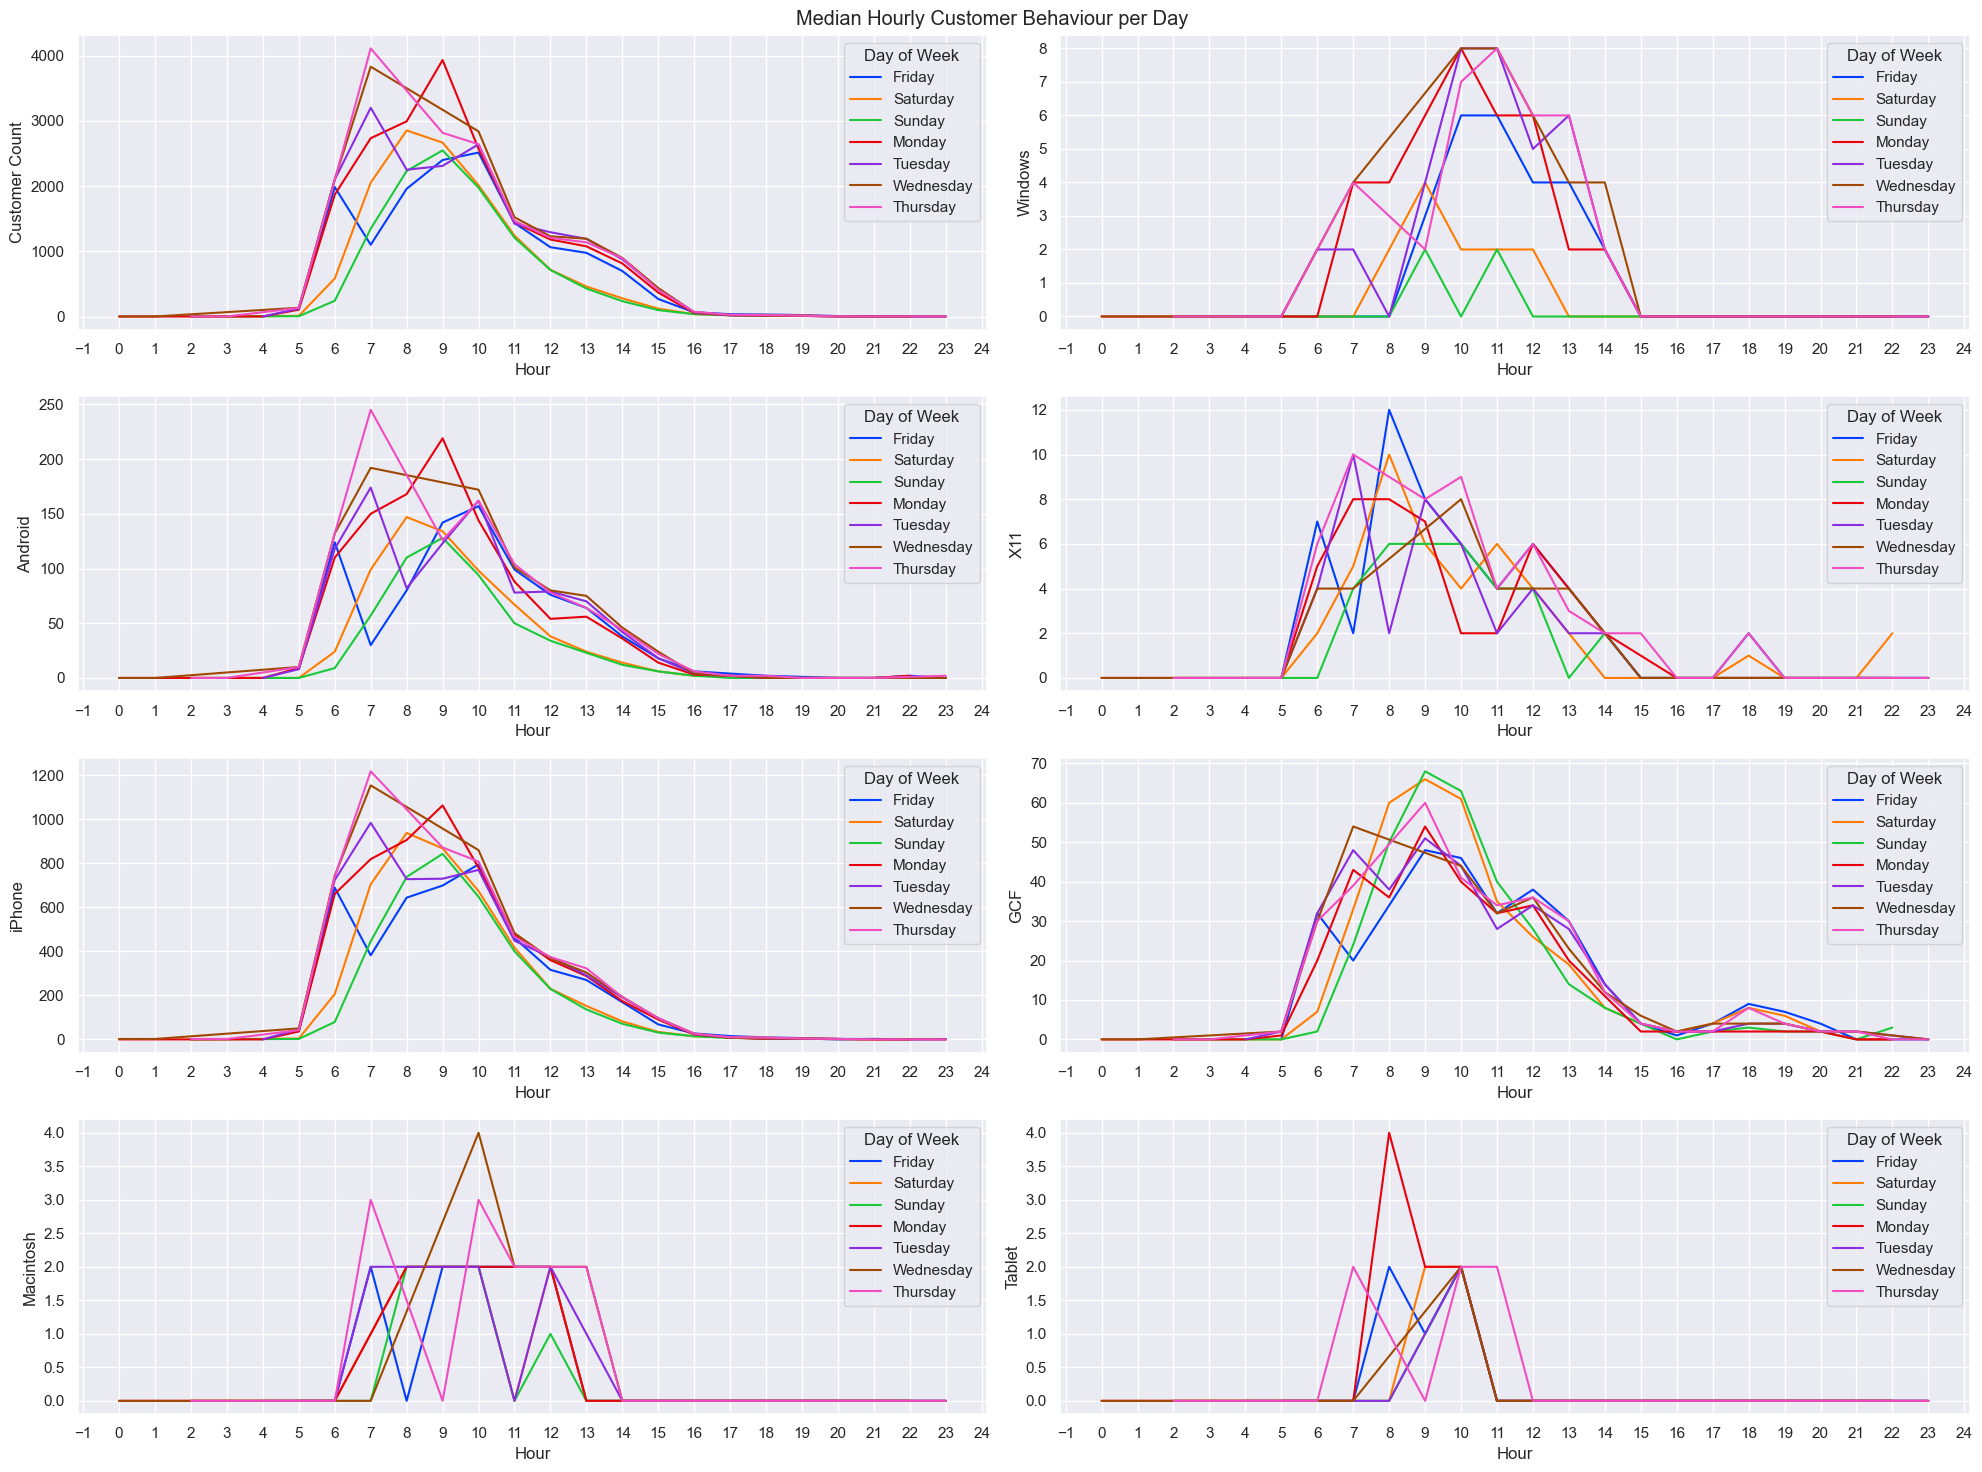

In [31]:
fig, axes = plt.subplots(4, 2, figsize=[20, 15])
sns.set_palette("bright")
ax1 = sns.lineplot(x='Hour', y='Customer Count', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[0,0])
ax2 = sns.lineplot(x='Hour', y='Android', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[1,0])
ax3 = sns.lineplot(x='Hour', y='iPhone', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[2,0])
ax4 = sns.lineplot(x='Hour', y='Macintosh', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[3,0])
ax5 = sns.lineplot(x='Hour', y='Windows', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[0,1])
ax6 = sns.lineplot(x='Hour', y='X11', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[1,1])
ax7 = sns.lineplot(x='Hour', y='GCF', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[2,1])
ax8 = sns.lineplot(x='Hour', y='Tablet', hue='Day of Week', data=df, ci=None, estimator=np.median, ax = axes[3,1])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax5.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax5.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax6.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax6.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax7.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax7.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax8.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax8.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.suptitle ("Median Hourly Customer Behaviour per Day")
fig.tight_layout()
plt.show()

Looking at the total weekly customer count, we see that count peaks at Saturdays and Sundays. This may correspond to more customers having take outs due to customers having more time.

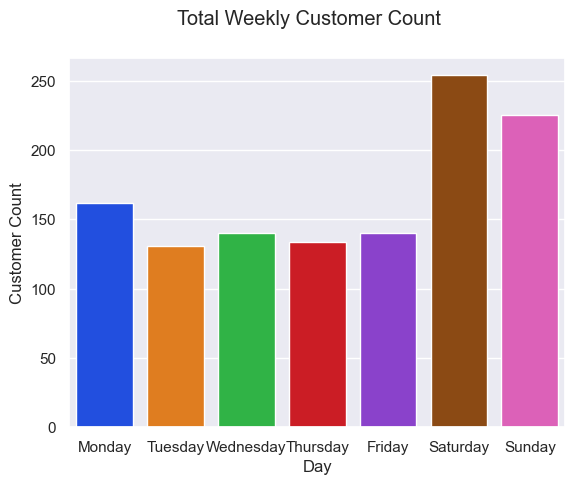

In [32]:
sns.barplot(x="Day", y="Customer Count", data=df, ci=None, estimator=np.median).set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.suptitle ("Total Weekly Customer Count")
fig.tight_layout()
plt.show()

Another user base we would like to look into are those that were blacklisted. As seen below, only a small portion of the user base is blacklisted.

In [33]:
blacklist = (df['Blacklisted'].sum()/df['Not Blacklisted'].sum())*100
print('% Blacklisted = ', blacklist)

% Blacklisted =  0.014906267240173774


We can note the graph below that there is a considerable amount of blacklisted users even when there is no promotion present. 

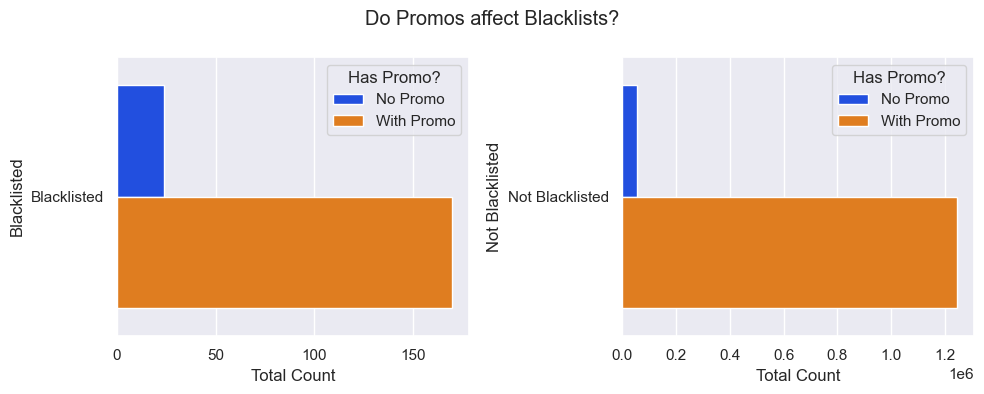

In [34]:
df5 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['Blacklisted'],var_name='Blacklisted',value_name='Total Count')
df6 = pd.melt(df, id_vars=['Has Promo?'], value_vars=['Not Blacklisted'],var_name='Not Blacklisted',value_name='Total Count')
fig, axes = plt.subplots(1, 2, figsize=[10, 4])
sns.set_palette("bright")
sns.barplot(x="Total Count", y="Blacklisted", hue="Has Promo?", orient='h', data=df5, ci=None, estimator=np.sum, ax = axes[0])
sns.barplot(x="Total Count", y="Not Blacklisted", hue="Has Promo?", orient='h', data=df6, ci=None, estimator=np.sum, ax = axes[1])
plt.suptitle ("Do Promos affect Blacklists?")
fig.tight_layout()
plt.show()

We can note below that users who were not blacklisted and blacklisted follow the same trend as those of the total customer count.

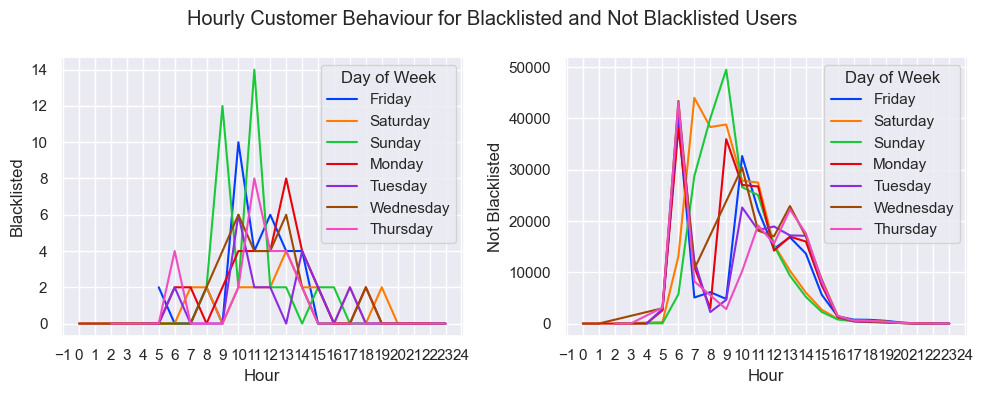

In [35]:
fig, axes = plt.subplots(1, 2, figsize=[10, 4])
sns.set_palette("bright")
ax1 = sns.lineplot(x='Hour', y='Blacklisted', hue='Day of Week', data=df, ci=None, estimator=np.sum, ax = axes[0])
ax2 = sns.lineplot(x='Hour', y='Not Blacklisted', hue='Day of Week', data=df, ci=None, estimator=np.sum, ax = axes[1])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.suptitle ("Hourly Customer Behaviour for Blacklisted and Not Blacklisted Users")
fig.tight_layout()
plt.show()

## Conclusion

In this notebook, we determined how promotions affect the business and its respective customers. We determined that Order Amount is strongly correlated to the number of customers, orders, and vendors while number of promotion is only moderately correlated. We also discerned that promotions positively impact the business and the number of active users in various platforms, wheter mobile, desktop or others. 